In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [10]:
df = pd.read_csv(os.path.join("train_80.csv"))

In [11]:
cats = df[ df['Type'] == 2 ].index 
df.drop(cats, inplace = True) 
df.shape

(8132, 25)

In [13]:
y = df["AdoptionSpeed"]

In [15]:
# Model 1
## k=9 Test Accuracy: 0.382
X = df[['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3','MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']]
X.shape

(8132, 18)

In [35]:
# Model #2 - Dropping Breed 2, Color 2&3, Qty
## k=19 Test Accuracy: 0.382

X = df[['Type', 'Age', 'Breed1', 'Gender', 'Color1', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']]
X.head(3)

,Type,Age,Breed1,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt
2,1,1,307,1,2,2,2,1,1,2,1,1,0,0,7
3,1,4,307,2,1,2,1,1,1,2,1,1,150,0,8
4,1,1,307,1,1,2,1,2,2,2,1,1,0,0,3


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.900/0.357
k: 3, Train/Test Score: 0.609/0.336
k: 5, Train/Test Score: 0.549/0.352
k: 7, Train/Test Score: 0.523/0.372
k: 9, Train/Test Score: 0.495/0.382
k: 11, Train/Test Score: 0.486/0.378
k: 13, Train/Test Score: 0.474/0.371
k: 15, Train/Test Score: 0.459/0.375
k: 17, Train/Test Score: 0.458/0.379
k: 19, Train/Test Score: 0.449/0.382


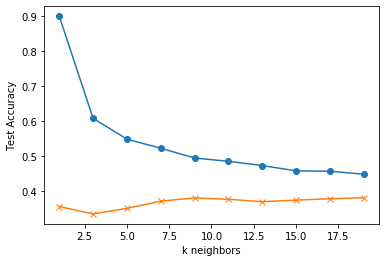

In [37]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Test Accuracy")
plt.show()

In [38]:
# Note that k: 17 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
print('k=19 Test Accuracy: %.3f' % knn.score(X_test, y_test))

k=19 Test Accuracy: 0.382
